## Loading data into Pandas

In [65]:
import pandas as pd

df = pd.read_csv('pokemon_data.csv')
df
# print(df.head(5))

# df_xlsx = pd.read_excel('pokemon_data.xlsx')
# print(df_xlsx.head(3))

# df = pd.read_csv('pokemon_data.txt', delimiter='\t')

# print(df.head(5))

#df['HP']

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


## Reading Data in Pandas

In [ ]:
#### Read Headers
df.columns

## Read each Column
#print(df[['Name', 'Type 1', 'HP']])

## Read Each Row
#print(df.iloc[0:4])
# for index, row in df.iterrows():
#     print(index, row['Name'])
#df.loc[df['Type 1'] == "Grass"]

## Read a specific location (R,C)
#print(df.iloc[2,1])


## Sorting/Describing Data

In [ ]:
df.sort_values(['Type 1', 'HP'], ascending=[1,0])

df

## Making changes to the data

In [ ]:
#df['Total'] = df['HP'] + df['Attack'] + df['Defense'] + df['Sp. Atk'] + df['Sp. Def'] + df['Speed']

# df = df.drop(columns=['Total'])

df['Total'] = df.iloc[:, 4:10].sum(axis=1)

cols = list(df.columns)
df = df[cols[0:4] + [cols[-1]]+cols[4:12]]

df.head(5)

In [ ]:
45+49+49+65+65+45

## Saving our Data (Exporting into Desired Format)

In [ ]:
df.to_csv('modified.csv')

#df.to_excel('modified.xlsx', index=False)

#df.to_csv('modified.txt', index=False, sep='\t')




## Filtering Data

In [ ]:
new_df = df.loc[(df['Type 1'] == 'Grass') & (df['Type 2'] == 'Poison') & (df['HP'] > 70)]

new_df.reset_index(drop=True, inplace=True)

new_df

new_df.to_csv('filtered.csv')

new_df.reset_index(drop=True, inplace= True)

new_df



## Conditional Changes

In [ ]:


# df.loc[df['Total'] > 500, ['Generation','Legendary']] = ['Test 1', 'Test 2']

# df

#df.loc[df['Type 1]] == 'Fire', 'Type 1' ] = 'Flamer'

df = pd.read_csv('modified.csv')
df.groupby(['Type 1']).count()

## Aggregate Statistics (Groupby)


In [ ]:
df = pd.read_csv('modified.csv')

df['count'] = 1

df.groupby(['Type 1', 'Type 2']).count()['count']






## Working with large amounts of data



In [ ]:
new_df = pd.DataFrame(columns=df.columns)

for df in pd.read_csv('modified.csv', chunksize=5):
    results = df.groupby(['Type 1']).count()
    
    new_df = pd.concat([new_df, results])
    
new_df
    





# POR YURI

# Removendo Pokemon Megas do csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pokedex = pd.read_csv('modified.csv')

pokedex_filtered = pokedex[~pokedex['Name'].str.contains('mega', case=False)]
pokedex_filtered.to_csv('filtered_pokemon_data.csv', index=False)

# Gráfico Pie, % Total de cada tipo de pokemon.

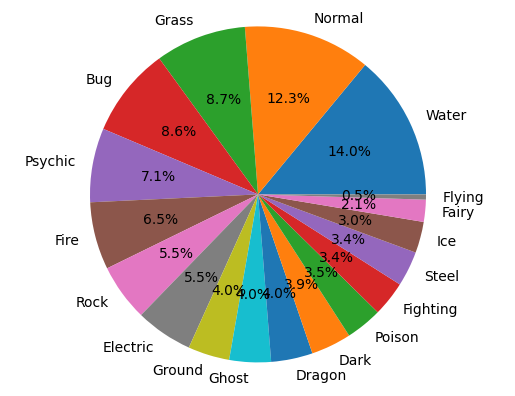

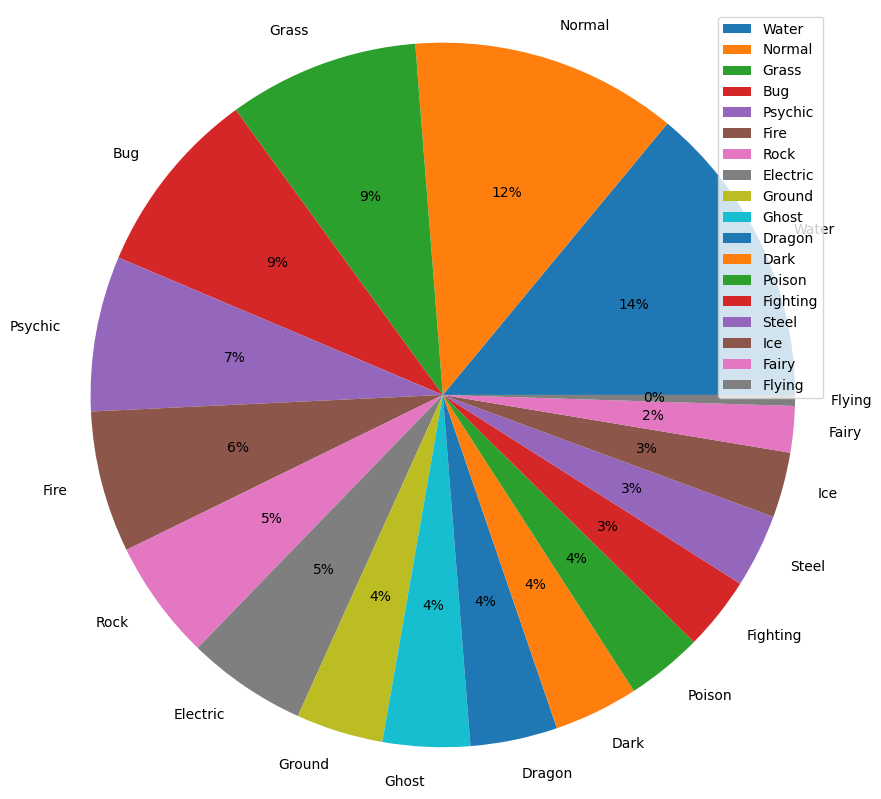

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

pokedex = pd.read_csv('pokemon_data.csv')

poke_type = pokedex['Type 1'].value_counts()

poke_type.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal') 
plt.ylabel('') 
plt.show()

poke_dataframe = pd.DataFrame({'Type 1': poke_type.index, 'Count': poke_type.values})
poke_dataframe.plot.pie(y='Count', labels=poke_dataframe['Type 1'], autopct='%1.0f%%', figsize=(10, 10))
plt.axis('equal') 
plt.ylabel('')  
plt.show()

# Gráfico de barras mostrando quantidade total dos tipos de pokemon

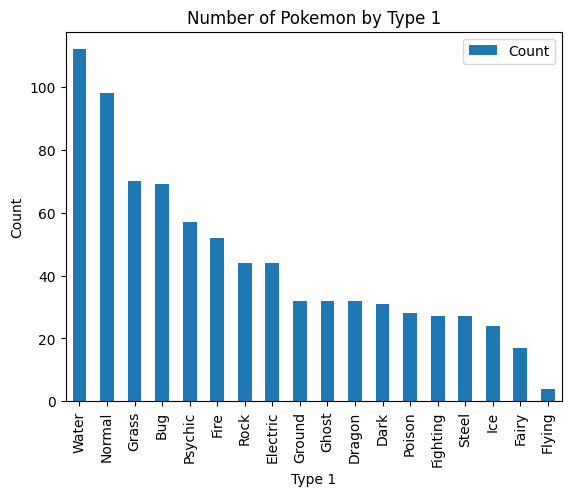

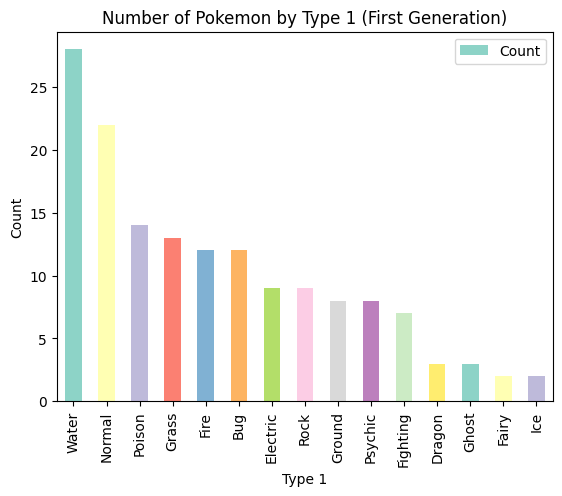

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pokedex = pd.read_csv('pokemon_data.csv')

poke_type = pokedex['Type 1'].value_counts()

poke_dataframe = pd.DataFrame({'Type 1': poke_type.index, 'Count': poke_type.values})
poke_dataframe.plot.bar(x='Type 1', y='Count')
plt.xlabel('Type 1')
plt.ylabel('Count')
plt.title('Number of Pokemon by Type 1')
plt.show()


pokedex = pd.read_csv('filtered_pokemon_data.csv')
subset_pokedex = pokedex.iloc[0:152]

poke_type = subset_pokedex['Type 1'].value_counts()

poke_dataframe = pd.DataFrame({'Type 1': poke_type.index, 'Count': poke_type.values})

color_palette = sns.color_palette('Set3', len(poke_dataframe))

poke_dataframe.plot.bar(x='Type 1', y='Count', color = color_palette)
plt.xlabel('Type 1')
plt.ylabel('Count')
plt.title('Number of Pokemon by Type 1 (First Generation)')
plt.show()

# Gráfico TOP 10 Lendarios mais fortes (Status Totais)

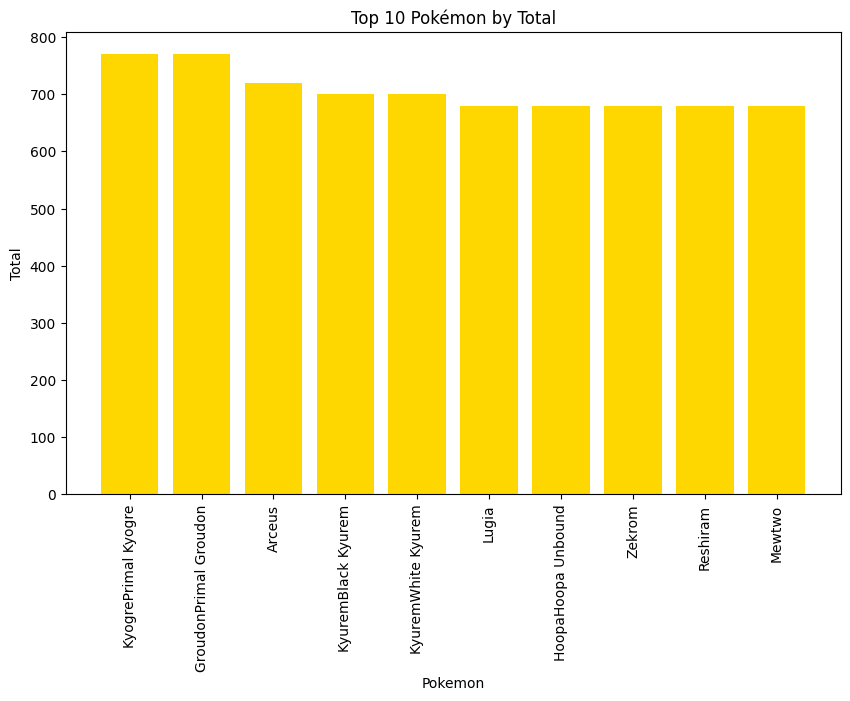

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

pokedex = pd.read_csv('filtered_pokemon_data.csv')

# Sort the DataFrame by 'Total' column in descending order
sorted_pokedex = pokedex.sort_values(by='Total', ascending=False)

# Get the top 10 Pokémon based on 'Total' and 'Legendary'
top_10_pokemon = sorted_pokedex.head(10)

# Create a bar plot of the top 10 Pokémon
plt.figure(figsize=(10, 6))
plt.bar(top_10_pokemon['Name'], top_10_pokemon['Total'], color=top_10_pokemon['Legendary'].map({True: 'gold', False: 'blue'}))
plt.xlabel('Pokemon')
plt.ylabel('Status Total')
plt.title('Top 10 Pokémon by Total')
plt.xticks(rotation=90)
plt.show()